# 일원 분산 분석

주어진 데이터는 4가지 다른 교육 방법을 적용한 대학생들의 학점 결과이다. 이 실험에서는 비슷한 실력을 가진 학생 40명을 무작위로 4개(A, B, C, D)그룹으로 나누었고, 각 그룹은 다른 교육 방법을 적용했다. 학생들의 학점 결과에는 교육 방법에 따른 차이가 있는지 유의수준 0.5하에서 검정하시오.
- 귀무가설(H0): 네 가지 교육 방법에 의한 학생들의 학점 평균은 동일하다.
- 대립가설(H1): 적어도 두 그룹의 학점 평균은 다르다.

## 1. 기초

In [ ]:
# 요인이 하나 == 그룹을 나누는 기준이 하나!

import pandas as pd
df = pd.DataFrame({
    'A': [3.5, 4.3, 3.8, 3.6, 4.1, 3.2, 3.9, 4.4, 3.5, 3.3],
    'B': [3.9, 4.4, 4.1, 4.2, 4.5, 3.8, 4.2, 3.9, 4.4, 4.3],
    'C': [3.2, 3.7, 3.6, 3.9, 4.3, 4.1, 3.8, 3.5, 4.4, 4.0],
    'D': [3.8, 3.4, 3.1, 3.5, 3.6, 3.9, 3.2, 3.7, 3.3, 3.4]
})
print(df.head(2))

     A    B    C    D
0  3.5  3.9  3.2  3.8
1  4.3  4.4  3.7  3.4


### 일원 분산 분석

In [ ]:
# (정규성, 등분산)만족시 일원 분산 분석
from scipy import stats
stats.f_oneway(df['A'], df['B'], df['C'], df['D'])

# 0.05보다 작으므로 두 그룹의 학점 평균은 다르다. 채택

F_onewayResult(statistic=7.2969837587007, pvalue=0.0006053225519892207)

In [ ]:
# 정규성, 등분산, 일원 분산 분석

# Shapiro-Wilk(샤피로-윌크) 정규성 검정 -> pvalue가 0.05보다 크므로 정규분포 만족
print(stats.shapiro(df['A']))
print(stats.shapiro(df['B']))
print(stats.shapiro(df['C']))
print(stats.shapiro(df['D']))

# Levene(레빈) 등분산 검정 -> pvalue가 0.05보다 크므로 등분산 만족
print(stats.levene(df['A'], df['B'], df['C'], df['D']))

# 일원 분산 분석 (위에 다 만족하면 )
print(stats.f_oneway(df['A'], df['B'], df['C'], df['D']))

ShapiroResult(statistic=0.949882447719574, pvalue=0.667110025882721)
ShapiroResult(statistic=0.934644877910614, pvalue=0.49509894847869873)
ShapiroResult(statistic=0.9871343374252319, pvalue=0.9919547438621521)
ShapiroResult(statistic=0.9752339720726013, pvalue=0.9346861243247986)
LeveneResult(statistic=1.5433829973707245, pvalue=0.22000894224209636)
F_onewayResult(statistic=7.2969837587007, pvalue=0.0006053225519892207)


## 2. 심화
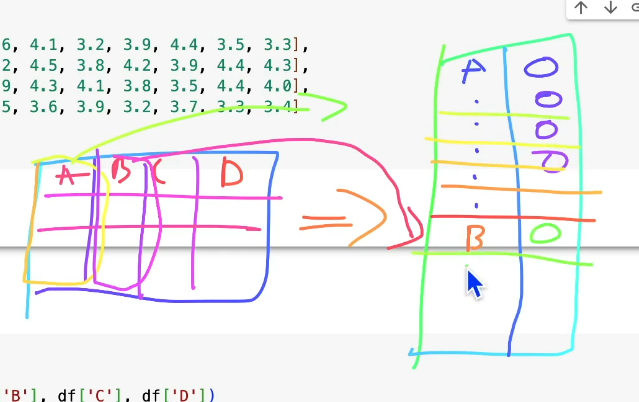

In [ ]:
# 데이터 재구조화 (긴 형태)
df_melt = df.melt()
df_melt.head()

,variable,value
0,A,3.5
1,A,4.3
2,A,3.8
3,A,3.6
4,A,4.1


### 분산분석 테이블

In [ ]:
# ANOVA 테이블
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('value ~ variable', data=df_melt).fit()
anova_lm(model)

# 만약 문제에서 df(자유도)	sum_sq(잔차제곱합)	mean_sq(평균제곱)
# 을 구한다면 statsmodels

,df,sum_sq,mean_sq,F,PR(>F)
variable,3.0,2.35875,0.78625,7.296984,0.000605
Residual,36.0,3.87900,0.10775,NaN,NaN


### 사후검정
- 목적: 어떤 그룹들 간에 통계적으로 유의미한 차이가 있는지 구체적으로 파악하는 것

In [ ]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Tukey HSD (투키)
tukey_result = pairwise_tukeyhsd(df_melt['value'], df_melt['variable'], alpha=0.05)
print(tukey_result.summary())

# Bonferroni(본페로니)
mc = MultiComparison(df_melt['value'], df_melt['variable'])
bon_result = mc.allpairtest(stats.ttest_ind, method='bonf')
print(bon_result[0])

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     0.41 0.0397  0.0146  0.8054   True
     A      C     0.09 0.9273 -0.3054  0.4854  False
     A      D    -0.27 0.2722 -0.6654  0.1254  False
     B      C    -0.32 0.1483 -0.7154  0.0754  False
     B      D    -0.68 0.0003 -1.0754 -0.2846   True
     C      D    -0.36 0.0852 -0.7554  0.0354  False
----------------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     A      B -2.7199  0.014    0.0843  False
     A      C  -0.515 0.6128       1.0  False
     A      D  1.7538 0.0965    0.5788  False
     B      C  2.2975 0.0338    0.2028  False
     B      D  6.0686    0.0    0.0001   True
     C      D  2.5219 0.0213    0.1279  False
---------

### 크루스칼-왈리스 검정 (비모수 검정)

In [ ]:
import pandas as pd
from scipy import stats

# 데이터
df = pd.DataFrame({
    'A': [10.5, 11.3, 10.8, 10.6, 11.1, 10.2, 10.9, 11.4, 10.5, 10.3],
    'B': [10.9, 11.4, 11.1, 11.2, 11.5, 10.8, 11.2, 10.9, 11.4, 11.3],
    'C': [10.2, 10.7, 10.6, 10.9, 11.3, 11.1, 10.8, 10.5, 11.4, 11.0],
    'D': [13.8, 10.4, 10.1, 10.5, 10.6, 10.9, 10.2, 10.7, 10.3, 10.4]
})

# 정규성 검정
print(stats.shapiro(df['A']))
print(stats.shapiro(df['B']))
print(stats.shapiro(df['C']))
print(stats.shapiro(df['D'])) # 정규성 불만족-> 비모수검정 수행

# Kruskal-Wallis 검정
stats.kruskal(df['A'], df['B'], df['C'], df['D'])

ShapiroResult(statistic=0.949882447719574, pvalue=0.667110025882721)
ShapiroResult(statistic=0.934644877910614, pvalue=0.49509894847869873)
ShapiroResult(statistic=0.9871343374252319, pvalue=0.9919547438621521)
ShapiroResult(statistic=0.5759974718093872, pvalue=2.8656615540967323e-05)


KruskalResult(statistic=11.183607021517561, pvalue=0.010773365310213669)

# 이원 분산 분석

가정에서 재배하고 있는 네 가지 토마토 종자(A, B, C, D)에 대해 세 가지 종류의 비료 (11, 12, 13)를 사용하여 재배된 토마토 수를 조사하였다. 종자 및 비료 종류 간의 토마토 수의 차이가 있는지 유의수준 0.05하에서 검정하시오.
(단, 정규성, 등분산성에 만족한 데이터)
- 종자 (주 효과)
    - 귀무가설(H0): 종자 간의 토마토 수에 차이가 없다.
    - 대립가설(H1): 적어도 하나의 종자에서 토마토 수에 차이가 있다.
- 비료 (주 효과)
    - 귀무가설(H0): 비료 종류 간의 토마토 수에 차이가 없다.
    - 대립가설(H1): 적어도 하나의 비료 종류에서 토마토 수에 차이가 있다.
- 상호작용 효과:
    - 귀무가설(H0): 종자와 비료 간의 상호작용은 토마토 수에 영향을 미치지 않는다.
    - 대립가설(H1): 종자와 비료 간의 상호작용은 토마토 수에 영향을 미친다.


## 1. 기초

In [ ]:
import pandas as pd
df = pd.read_csv("tomato.csv")
print(df.head())
print(df.shape)

  종자  비료  토마토수
0  A  11    54
1  A  11    48
2  A  11    56
3  A  11    65
4  A  11    47
(120, 3)


### 이원 분산 분석

In [ ]:
# 이원 분산 분석은 사이파이에서 제공 X
# 따라서 아노바 테이블을 만들고 statsmodel 사용
# anova 테이블
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('토마토수 ~ 종자 + 비료 + 종자:비료', data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
종자,3.0,4801.000000,1600.333333,18.297521,9.892196e-10
비료,1.0,877.812500,877.812500,10.036530,1.978360e-03
종자:비료,3.0,406.137500,135.379167,1.547867,2.061233e-01
Residual,112.0,9795.716667,87.461756,NaN,NaN


In [ ]:
# 범주형 데이터 처리 -> 범주형 변수 C로 감싸기
# 근데 토마토수는 종속변수고 회귀모델이기 때문에 당연히 수치형 변수임!
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('토마토수 ~ C(종자) + C(비료) + C(종자):C(비료)', data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(종자),3.0,4801.000000,1600.333333,18.757977,7.254117e-10
C(비료),2.0,1140.316667,570.158333,6.682993,1.835039e-03
C(종자):C(비료),6.0,725.350000,120.891667,1.417007,2.146636e-01
Residual,108.0,9214.000000,85.314815,NaN,NaN


In [ ]:
# 일반표기법 format(지수표기법, '.10f')
print(format(7.254117e-10,'.10f'))
print(format(1.835039e-03,'.10f'))
print(format(2.146636e-01,'.10f'))

# 종자와 비료는 모두 토마토수에 유의미한 영향을 준다!!
# 그로나 종자와 비료간 상호작용은 토마토수에 영향을 주지 않는다!

0.0000000007
0.0018350390
0.2146636000


In [ ]:
# formula * 활용 (다른 방법)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# model = ols('토마토수 ~ C(종자) + C(비료) + C(종자):C(비료)', data=df).fit()
model = ols('토마토수 ~ C(종자) * C(비료)', data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(종자),3.0,4801.000000,1600.333333,18.757977,7.254117e-10
C(비료),2.0,1140.316667,570.158333,6.682993,1.835039e-03
C(종자):C(비료),6.0,725.350000,120.891667,1.417007,2.146636e-01
Residual,108.0,9214.000000,85.314815,NaN,NaN


## 2. 심화

### 사후검정

In [ ]:
# 이원 분산 분석 수행
model = ols('토마토수 ~ C(종자) + C(비료) + C(종자):C(비료)', data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(종자),3.0,4801.000000,1600.333333,18.757977,7.254117e-10
C(비료),2.0,1140.316667,570.158333,6.682993,1.835039e-03
C(종자):C(비료),6.0,725.350000,120.891667,1.417007,2.146636e-01
Residual,108.0,9214.000000,85.314815,NaN,NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD
tukey_summary1 = pairwise_tukeyhsd(df['토마토수'], df['종자'], alpha=0.05)
tukey_summary2 = pairwise_tukeyhsd(df['토마토수'], df['비료'].astype(str), alpha=0.05)
print(tukey_summary1)
print(tukey_summary2)

# 영상에 나온 .astype(str)은 삭제해도 됩니다. Tukey HSD 검정이 내부적으로 그룹을 구별하기 위한 목적으로만 범주형 변수를 사용하기 때문입니다.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   5.7333 0.1106 -0.8444  12.311  False
     A      C     12.1    0.0  5.5223 18.6777   True
     A      D     16.7    0.0 10.1223 23.2777   True
     B      C   6.3667 0.0616  -0.211 12.9444  False
     B      D  10.9667 0.0002   4.389 17.5444   True
     C      D      4.6 0.2679 -1.9777 11.1777  False
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    11     12    0.175 0.9973 -5.7831  6.1331  False
    11     13    6.625 0.0254  0.6669 12.5831   True
    12     13     6.45 0.0305  0.4919 12.4081   True
----------------------------------------------------


In [ ]:
# Bonferroni
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['토마토수'], df['종자'])
bon_result = mc.allpairtest(stats.ttest_ind, method="bonf", alpha=0.05)
print(bon_result[0])

mc = MultiComparison(df['토마토수'], df['비료'])
bon_result = mc.allpairtest(stats.ttest_ind, method="bonf")
print(bon_result[0])

# 영상에 나온 .astype(str)은 삭제해도 됩니다.

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     A      B -2.3457 0.0224    0.1346  False
     A      C -4.9096    0.0       0.0   True
     A      D -7.0162    0.0       0.0   True
     B      C -2.3944 0.0199    0.1194  False
     B      D -4.2491 0.0001    0.0005   True
     C      D -1.7691 0.0821    0.4928  False
---------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    11     12 -0.0691 0.9451       1.0  False
    11     13 -2.8722 0.0052    0.0157   True
    12     13  -2.411 0.0183    0.0548  False
---------------------------------------------


### [참고] 정규성, 등분산

In [ ]:
from scipy.stats import shapiro

cond_tree_A = df['종자'] == 'A'
cond_tree_B = df['종자'] == 'B'
cond_tree_C = df['종자'] == 'C'
cond_tree_D = df['종자'] == 'D'

cond_fert_1 = df['비료'] == 11
cond_fert_2 = df['비료'] == 12
cond_fert_3 = df['비료'] == 13

print(shapiro(df[cond_tree_A & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_A & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_A & cond_fert_3]['토마토수']))

print(shapiro(df[cond_tree_B & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_B & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_B & cond_fert_3]['토마토수']))

print(shapiro(df[cond_tree_C & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_C & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_C & cond_fert_3]['토마토수']))

print(shapiro(df[cond_tree_D & cond_fert_1]['토마토수']))
print(shapiro(df[cond_tree_D & cond_fert_2]['토마토수']))
print(shapiro(df[cond_tree_D & cond_fert_3]['토마토수']))

ShapiroResult(statistic=0.8978164196014404, pvalue=0.20729322731494904)
ShapiroResult(statistic=0.9525046944618225, pvalue=0.698178768157959)
ShapiroResult(statistic=0.9625478982925415, pvalue=0.8144895434379578)
ShapiroResult(statistic=0.9678791165351868, pvalue=0.8705145716667175)
ShapiroResult(statistic=0.9723740816116333, pvalue=0.9119415283203125)
ShapiroResult(statistic=0.9000301957130432, pvalue=0.2192639261484146)
ShapiroResult(statistic=0.9434703588485718, pvalue=0.5922344923019409)
ShapiroResult(statistic=0.8953344225883484, pvalue=0.19456911087036133)
ShapiroResult(statistic=0.9231230020523071, pvalue=0.3837396204471588)
ShapiroResult(statistic=0.95850670337677, pvalue=0.7687198519706726)
ShapiroResult(statistic=0.9392850399017334, pvalue=0.545085608959198)
ShapiroResult(statistic=0.9591976404190063, pvalue=0.7766856551170349)


In [ ]:
from scipy.stats import levene
print(levene(df[cond_tree_A]['토마토수'],
             df[cond_tree_B]['토마토수'],
             df[cond_tree_C]['토마토수'],
             df[cond_tree_D]['토마토수']))
print(levene(df[cond_fert_1]['토마토수'],
             df[cond_fert_2]['토마토수'],
             df[cond_fert_3]['토마토수']))

LeveneResult(statistic=0.29736371082729113, pvalue=0.827239106138081)
LeveneResult(statistic=1.7801628913209462, pvalue=0.17314691537302473)


In [ ]:
# 시험 환경을 위한 데이터 생성 코드 (환경에 따라 생성된 데이터가 같지 않을 수도 있음)
import pandas as pd
import numpy as np
np.random.seed(42)
n = 10
trees = ['A', 'B', 'C', 'D']
fertilizers = [11, 12, 13]
data = []
for tree in trees:
    for fertilizer in fertilizers:
        growth_rates = np.random.normal(50, 10, n) + (trees.index(tree) * 5) + (fertilizers.index(fertilizer) * 3)
        for rate in growth_rates:
            data.append([tree, fertilizer, rate])
df = pd.DataFrame(data, columns=['종자', '비료', '토마토수'])
df['토마토수'] = df['토마토수'].astype(int)
df.to_csv("tomato.csv", index=False)
df.head()

,종자,비료,토마토수
0,A,11,54
1,A,11,48
2,A,11,56
3,A,11,65
4,A,11,47
